In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

traindata = pd.read_csv('/home/ritika/NetworkIntrusionDetection/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv')
testdata = pd.read_csv('/home/ritika/NetworkIntrusionDetection/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv')

traindata=traindata.drop('id',axis=1)
testdata=testdata.drop('id',axis=1)

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

traindata['proto'] = lb_make.fit_transform(traindata['proto'])
traindata['service'] = lb_make.fit_transform(traindata['service'])
traindata['state'] = lb_make.fit_transform(traindata['state'])

testdata['proto'] = lb_make.fit_transform(testdata['proto'])
testdata['service'] = lb_make.fit_transform(testdata['service'])
testdata['state'] = lb_make.fit_transform(testdata['state'])

X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,-1]
x = testdata.iloc[:,1:42]
y = testdata.iloc[:,-1]

Using TensorFlow backend.
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ritika/.virtualen

In [2]:
Arr = X.values
arr = x.values

import librosa
Arr_Delta = librosa.feature.delta(Arr)
arr_delta = librosa.feature.delta(arr)

Delta = librosa.feature.delta(Arr_Delta)
delta = librosa.feature.delta(arr_delta)

Delta1 = pd.DataFrame(Arr_Delta)
delta1 = pd.DataFrame(arr_delta)
Delta2 = pd.DataFrame(Delta)
delta2 = pd.DataFrame(delta)

XDelta1 = pd.concat([X, Delta1, Delta2], axis=1)
xdelta1 = pd.concat([x, delta1, delta2], axis=1)

scaler = Normalizer().fit(XDelta1)
XDelta1 = scaler.transform(XDelta1)
scaler = Normalizer().fit(xdelta1)
xdelta1 = scaler.transform(xdelta1)

Y = np.array(Y)
y = np.array(y)

XDelta1 = np.reshape(XDelta1, (XDelta1.shape[0],XDelta1.shape[1],1))
xdelta1 = np.reshape(xdelta1, (xdelta1.shape[0],xdelta1.shape[1],1))

In [3]:
cnn = Sequential()
cnn.add(Convolution1D(64, 3, border_mode="same",activation="relu",input_shape=(123, 1)))
cnn.add(MaxPooling1D(pool_length=(2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="sigmoid"))
cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
cnn.summary()

/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, activation="relu", input_shape=(123, 1), padding="same")`
  
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 123, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3904)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               499840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 500,225
Trai

In [4]:
history = cnn.fit(XDelta1, Y, epochs=200, validation_data=(xdelta1, y))


Train on 175341 samples, validate on 82332 samples
Epoch 1/200
175341/175341 [==============================] - 141s 806us/step - loss: 0.3945 - accuracy: 0.7976 - val_loss: 0.5366 - val_accuracy: 0.6875
Epoch 2/200
175341/175341 [==============================] - 140s 798us/step - loss: 0.3665 - accuracy: 0.8203 - val_loss: 0.5640 - val_accuracy: 0.6886
Epoch 3/200
175341/175341 [==============================] - 140s 801us/step - loss: 0.3611 - accuracy: 0.8226 - val_loss: 0.5496 - val_accuracy: 0.6886
Epoch 4/200
175341/175341 [==============================] - 139s 794us/step - loss: 0.3569 - accuracy: 0.8253 - val_loss: 0.5311 - val_accuracy: 0.6956
Epoch 5/200
175341/175341 [==============================] - 137s 779us/step - loss: 0.3546 - accuracy: 0.8274 - val_loss: 0.5455 - val_accuracy: 0.7013
Epoch 6/200
175341/175341 [==============================] - 141s 803us/step - loss: 0.3524 - accuracy: 0.8284 - val_loss: 0.5461 - val_accuracy: 0.7021
Epoch 7/200
175341/175341 [===

175341/175341 [==============================] - 131s 747us/step - loss: 0.3419 - accuracy: 0.8345 - val_loss: 0.5358 - val_accuracy: 0.7061
Epoch 53/200
175341/175341 [==============================] - 135s 768us/step - loss: 0.3423 - accuracy: 0.8334 - val_loss: 0.5317 - val_accuracy: 0.7121
Epoch 54/200
175341/175341 [==============================] - 135s 772us/step - loss: 0.3412 - accuracy: 0.8348 - val_loss: 0.5372 - val_accuracy: 0.7044
Epoch 55/200
175341/175341 [==============================] - 143s 816us/step - loss: 0.3408 - accuracy: 0.8343 - val_loss: 0.5370 - val_accuracy: 0.7063
Epoch 56/200
175341/175341 [==============================] - 138s 785us/step - loss: 0.3405 - accuracy: 0.8341 - val_loss: 0.5445 - val_accuracy: 0.7052
Epoch 57/200
175341/175341 [==============================] - 136s 774us/step - loss: 0.3402 - accuracy: 0.8343 - val_loss: 0.5293 - val_accuracy: 0.7063
Epoch 58/200
175341/175341 [==============================] - 140s 801us/step - loss: 0.3

175341/175341 [==============================] - 109s 620us/step - loss: 0.3361 - accuracy: 0.8409 - val_loss: 0.5363 - val_accuracy: 0.7340
Epoch 106/200
175341/175341 [==============================] - 109s 621us/step - loss: 0.3361 - accuracy: 0.8391 - val_loss: 0.5537 - val_accuracy: 0.7115
Epoch 107/200
175341/175341 [==============================] - 108s 618us/step - loss: 0.3357 - accuracy: 0.8409 - val_loss: 0.5385 - val_accuracy: 0.7147
Epoch 108/200
175341/175341 [==============================] - 101s 575us/step - loss: 0.3355 - accuracy: 0.8402 - val_loss: 0.5315 - val_accuracy: 0.7167
Epoch 109/200
175341/175341 [==============================] - 109s 622us/step - loss: 0.3347 - accuracy: 0.8404 - val_loss: 0.5384 - val_accuracy: 0.7164
Epoch 110/200
175341/175341 [==============================] - 109s 621us/step - loss: 0.3351 - accuracy: 0.8403 - val_loss: 0.5427 - val_accuracy: 0.7125
Epoch 111/200
175341/175341 [==============================] - 109s 622us/step - los

Epoch 158/200
175341/175341 [==============================] - 106s 603us/step - loss: 0.3245 - accuracy: 0.8514 - val_loss: 0.5366 - val_accuracy: 0.7171
Epoch 159/200
175341/175341 [==============================] - 107s 609us/step - loss: 0.3269 - accuracy: 0.8499 - val_loss: 0.5532 - val_accuracy: 0.7087
Epoch 160/200
175341/175341 [==============================] - 99s 563us/step - loss: 0.3266 - accuracy: 0.8493 - val_loss: 0.5484 - val_accuracy: 0.7126
Epoch 161/200
175341/175341 [==============================] - 106s 605us/step - loss: 0.3250 - accuracy: 0.8508 - val_loss: 0.5294 - val_accuracy: 0.7179
Epoch 162/200
175341/175341 [==============================] - 107s 608us/step - loss: 0.3259 - accuracy: 0.8498 - val_loss: 0.5297 - val_accuracy: 0.7170
Epoch 163/200
175341/175341 [==============================] - 106s 605us/step - loss: 0.3251 - accuracy: 0.8508 - val_loss: 0.5365 - val_accuracy: 0.7207
Epoch 164/200
175341/175341 [==============================] - 106s 604

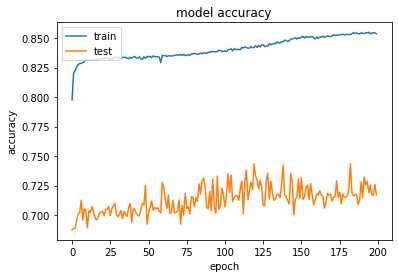

In [5]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('BinaryEFD2 + CNN + Accuracy.png')
plt.show()

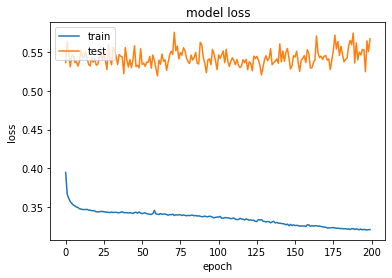

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('BinaryEFD2 ++ CNN + Loss.png')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score,classification_report
predictions = cnn.predict([xdelta1])
predictions = [0 if i<0.5 else 1 for i in predictions]
print("Accuracy: ",accuracy_score(y,predictions))
from sklearn.metrics import confusion_matrix

print("Classification Report: \n",classification_report(y,predictions))
conmat = np.array(confusion_matrix(y, predictions, labels=[0,1]))
confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
print (confusion)

Accuracy:  0.7170601953068065
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.38      0.55     37000
           1       0.66      0.99      0.79     45332

    accuracy                           0.72     82332
   macro avg       0.82      0.69      0.67     82332
weighted avg       0.80      0.72      0.68     82332

          predicted_negative  predicted_positive
negative               14134               22866
positive                 429               44903
